In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 2: Calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate the short-term EMA (12-day)
    data['EMA12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    # Calculate the long-term EMA (26-day)
    data['EMA26'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    # MACD Line
    data['MACD'] = data['EMA12'] - data['EMA26']
    # Signal Line
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    # MACD Histogram
    data['MACD Histogram'] = data['MACD'] - data['Signal Line']
    return data

In [7]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2024-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the MACD calculation
    data = calculate_macd(data)
    
    # Step 3: Plot MACD
    plt.figure(figsize=(14, 10))
    
    # Plot the Close Price
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot the MACD Line and Signal Line
    plt.subplot(3, 1, 2)
    plt.plot(data['MACD'], label='MACD Line', color='blue', linestyle='-')
    plt.plot(data['Signal Line'], label='Signal Line', color='red', linestyle='--')
    plt.title('MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)

[*********************100%***********************]  1 of 1 completed


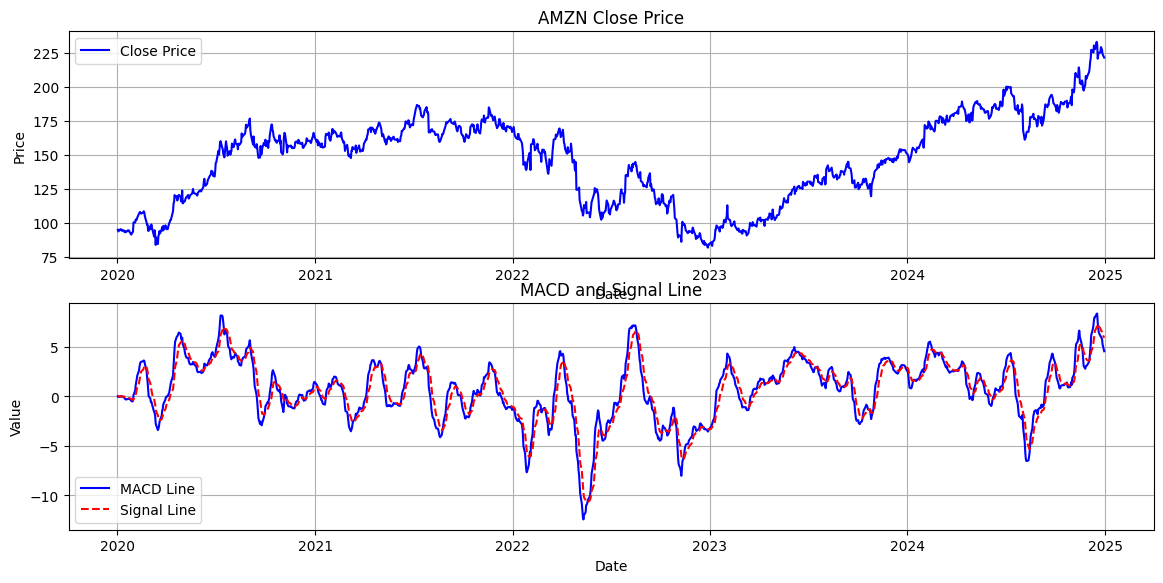

In [8]:
show_graph("AMZN")